# Prediction over imported music

In [36]:
## Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
data = pd.read_csv('datasets/test_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            35 non-null     object 
 1   tempo               35 non-null     float64
 2   beats               35 non-null     int64  
 3   chroma_stft         35 non-null     float64
 4   rmse                35 non-null     float64
 5   spectral_centroid   35 non-null     float64
 6   spectral_bandwidth  35 non-null     float64
 7   rolloff             35 non-null     float64
 8   zero_crossing_rate  35 non-null     float64
 9   mfcc1               35 non-null     float64
 10  mfcc2               35 non-null     float64
 11  mfcc3               35 non-null     float64
 12  mfcc4               35 non-null     float64
 13  mfcc5               35 non-null     float64
 14  mfcc6               35 non-null     float64
 15  mfcc7               35 non-null     float64
 16  mfcc8     

In [38]:
data = data.sort_values(by=['filename'], inplace=False, ascending=True)
data.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
31,dorian_extra_spring.mp3,89.102909,243,0.306618,0.199993,618.543630,993.545715,1182.406739,0.019852,-266.241058,...,-3.131824,-6.637165,-5.287173,-6.651552,-5.349977,-6.044914,-6.323789,-4.081663,-5.433681,1
20,dorian_fin_blossom.mp3,107.666016,286,0.468073,0.193901,2341.914535,2568.505733,5145.604996,0.097729,-78.212234,...,4.088146,-4.871248,0.773081,-0.310743,3.784795,-6.100012,0.968041,-4.526542,-1.435229,1
6,dorian_fin_ginger.mp3,117.453835,345,0.395492,0.174233,1546.841204,1623.535619,2923.072602,0.084616,-101.115044,...,2.967866,-5.375586,0.351534,-3.104366,-3.078375,-9.486562,-2.543094,-0.375553,-2.389703,1
7,dorian_fin_golden.mp3,123.046875,358,0.450941,0.147608,1416.746432,1697.588645,2894.689441,0.058519,-131.419052,...,3.255199,0.410236,0.315874,4.245101,5.850122,-9.109762,2.414572,-2.251781,-4.539885,1
34,dorian_fin_prison.mp3,143.554688,420,0.374767,0.205317,1586.329456,1691.029320,3166.239188,0.079074,-87.898048,...,1.672907,-7.576626,2.324652,-2.893663,-6.418336,-9.823860,0.672970,-6.410025,-3.009352,1


In [39]:
data = data.drop(columns = ['tempo','spectral_centroid','mfcc2','mfcc8'])

In [40]:
song = data.iloc[:,0]
features = data.drop(columns = ['filename', 'label'])

In [42]:
## train AdaBoost with ExtraTreeForest retrieve variables and train the model on all Kaggle dataset

%store -r raw_data
%store -r raw_data_uncorr

X = raw_data_uncorr.iloc[:,:24]
Y = raw_data_uncorr.iloc[:,24]
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.35,
                                                   stratify=Y)

ada_clf = AdaBoostClassifier(
    ExtraTreesClassifier(n_estimators=150, n_jobs=-1, max_features='auto'),
    algorithm='SAMME.R',
    learning_rate=0.5
)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=ExtraTreesClassifier(n_estimators=150,
                                                       n_jobs=-1),
                   learning_rate=0.5)

In [43]:
expected = song
ada_predicted = ada_clf.predict(features)

In [44]:
pd.DataFrame(ada_clf.predict_proba(features), columns = ada_clf.classes_, index = expected)

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
filename,,,,,,,,,,
dorian_extra_spring.mp3,0.333333,1.733333e-01,0.286667,2.666667e-02,0.006667,1.000000e-01,2.000000e-02,2.000000e-02,0.013333,0.020000
dorian_fin_blossom.mp3,0.040000,1.333333e-02,0.080000,2.466667e-01,0.220000,5.333333e-02,2.000000e-02,5.333333e-02,0.140000,0.133333
dorian_fin_ginger.mp3,0.080000,2.333333e-01,0.153333,8.666667e-02,0.066667,1.066667e-01,1.333333e-02,6.666667e-03,0.080000,0.173333
dorian_fin_golden.mp3,0.140000,9.333333e-02,0.106667,7.333333e-02,0.073333,6.666667e-02,9.333333e-02,2.220446e-16,0.253333,0.100000
dorian_fin_prison.mp3,0.106667,1.666667e-01,0.173333,8.666667e-02,0.026667,6.000000e-02,8.666667e-02,5.333333e-02,0.080000,0.160000
dorian_fin_solitude.mp3,0.033333,6.666667e-02,0.200000,1.000000e-01,0.053333,1.600000e-01,6.666667e-03,4.000000e-02,0.220000,0.120000
dorian_fin_stars.mp3,0.066667,9.333333e-02,0.240000,8.000000e-02,0.066667,1.333333e-01,6.666667e-03,1.333333e-02,0.180000,0.120000
hebv_df_duuug.mp3,0.060000,4.666667e-02,0.173333,1.800000e-01,0.133333,4.666667e-02,6.666667e-02,7.333333e-02,0.113333,0.106667
hebv_df_fury.mp3,0.080000,8.000000e-02,0.160000,2.133333e-01,0.120000,2.000000e-02,7.333333e-02,8.000000e-02,0.053333,0.120000


In [45]:
matrix = pd.DataFrame(expected)

In [46]:
matrix['genre_ada'] = pd.Series(ada_predicted)

In [47]:
matrix

,filename,genre_ada
31,dorian_extra_spring.mp3,country
20,dorian_fin_blossom.mp3,rock
6,dorian_fin_ginger.mp3,country
7,dorian_fin_golden.mp3,disco
34,dorian_fin_prison.mp3,reggae
14,dorian_fin_solitude.mp3,metal
25,dorian_fin_stars.mp3,country
0,hebv_df_duuug.mp3,blues
2,hebv_df_fury.mp3,classical
32,hebv_ds_mice.mp3,country


In [48]:
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
features = pd.DataFrame(StandardScaler().fit_transform(features))

In [49]:
svm_rbf_clf = SVC(kernel = 'rbf', C = 2.66, gamma = 0.05)
svm_rbf_clf.fit(X_train, y_train)

SVC(C=2.66, gamma=0.05)

In [50]:
svc_predicted = svm_rbf_clf.predict(features)

In [51]:
matrix['genre_svc'] = pd.Series(svc_predicted)
matrix

,filename,genre_ada,genre_svc
31,dorian_extra_spring.mp3,country,country
20,dorian_fin_blossom.mp3,rock,disco
6,dorian_fin_ginger.mp3,country,classical
7,dorian_fin_golden.mp3,disco,disco
34,dorian_fin_prison.mp3,reggae,reggae
14,dorian_fin_solitude.mp3,metal,metal
25,dorian_fin_stars.mp3,country,jazz
0,hebv_df_duuug.mp3,blues,blues
2,hebv_df_fury.mp3,classical,classical
32,hebv_ds_mice.mp3,country,country


In [52]:
matrix['result'] = np.where(matrix['genre_ada'] == matrix['genre_svc'], 'Yes', 'No')
matrix

,filename,genre_ada,genre_svc,result
31,dorian_extra_spring.mp3,country,country,Yes
20,dorian_fin_blossom.mp3,rock,disco,No
6,dorian_fin_ginger.mp3,country,classical,No
7,dorian_fin_golden.mp3,disco,disco,Yes
34,dorian_fin_prison.mp3,reggae,reggae,Yes
14,dorian_fin_solitude.mp3,metal,metal,Yes
25,dorian_fin_stars.mp3,country,jazz,No
0,hebv_df_duuug.mp3,blues,blues,Yes
2,hebv_df_fury.mp3,classical,classical,Yes
32,hebv_ds_mice.mp3,country,country,Yes


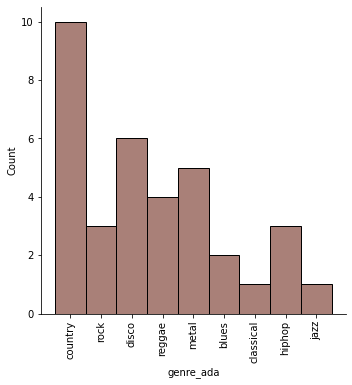

In [53]:
ada_plot = sn.displot(matrix, x="genre_ada", color = '#8c564b', bins=9)
ada_plot.set_xticklabels(rotation=90)

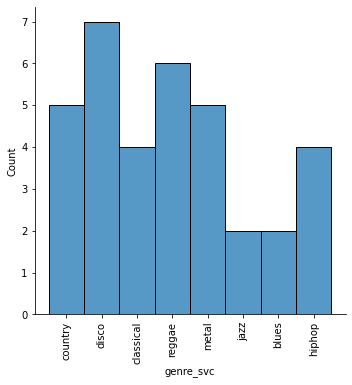

In [54]:
svc_plot = sn.displot(matrix, x="genre_svc", color = "#1f77b4", bins=9)
svc_plot.set_xticklabels(rotation=90)

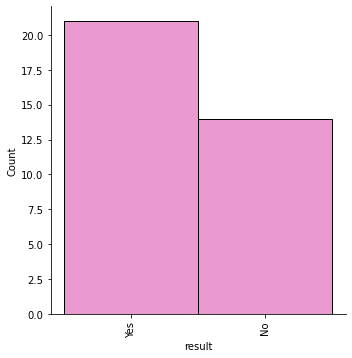

In [55]:
plot = sn.displot(matrix, x="result", color = "#e377c2", bins=2)
plot.set_xticklabels(rotation=90)

In [56]:
cnf_matrix = confusion_matrix(ada_predicted, svc_predicted)
cnf_matrix

array([[2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 5, 0, 0, 1, 0, 2, 0],
       [0, 0, 0, 6, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 4, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 2, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0]])

<AxesSubplot:>

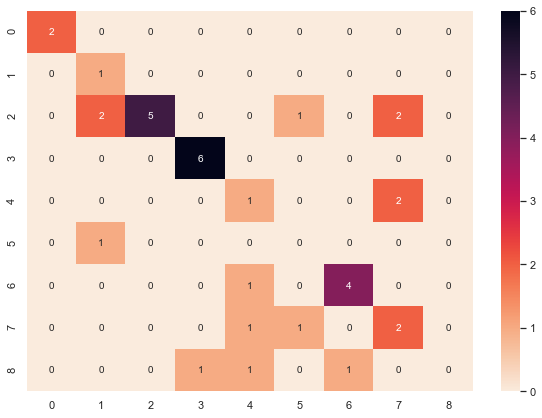

In [57]:
data = cnf_matrix
plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
heatmap = sn.heatmap(data, cmap="rocket_r", annot=True, annot_kws={"size": 10})# font size
heatmap

In [58]:
matrix.to_csv('results.csv')